In [1]:
import requests
from lxml import etree
import pandas as pd
import chardet
import time
import warnings
warnings.filterwarnings("ignore")
import csv

# 静态网站的定义

**静态网站的特点：**

静态网站是最初的建站方式，浏览者所看到的每个页面是建站者上传到服务器上的一个 html （ htm ）文件，这种网站每增加、删除、修改一个页面，都必须重新对服务器的文件进行一次下载上传。

通俗来说，静态网页是指存放在服务器文件系统中实实在在的HTML文件。当用户在浏览器中输入页面的URL，然后回车，浏览器就会将对应的HTML文件下载、渲染并呈现在窗口中。早期的网站通常都是由静态页面制作的

如下图:静态页面是你**可以直接**在F12中查找的到文本数据的;

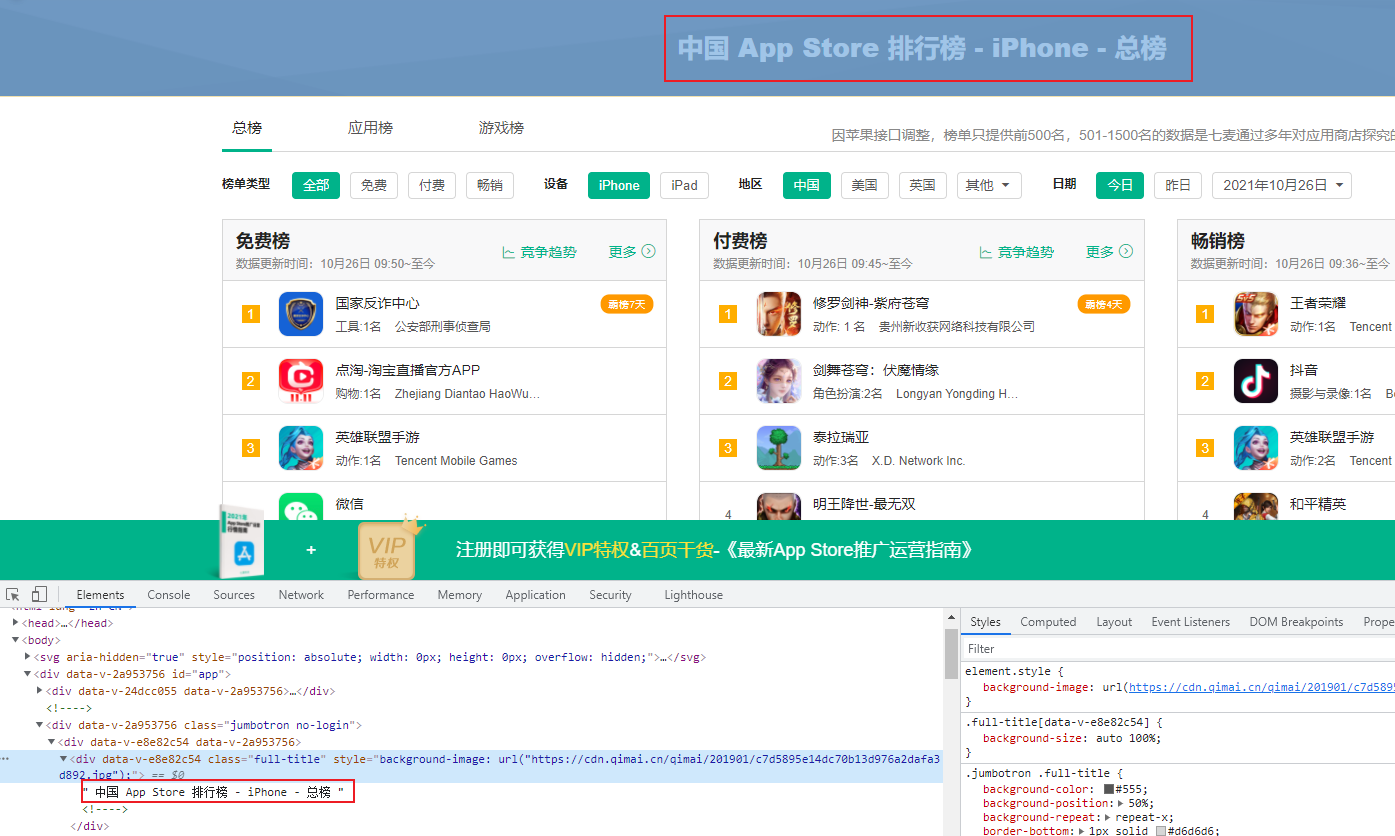

如下图:动态页面是你**无法直接**在F12中查找的到文本数据;

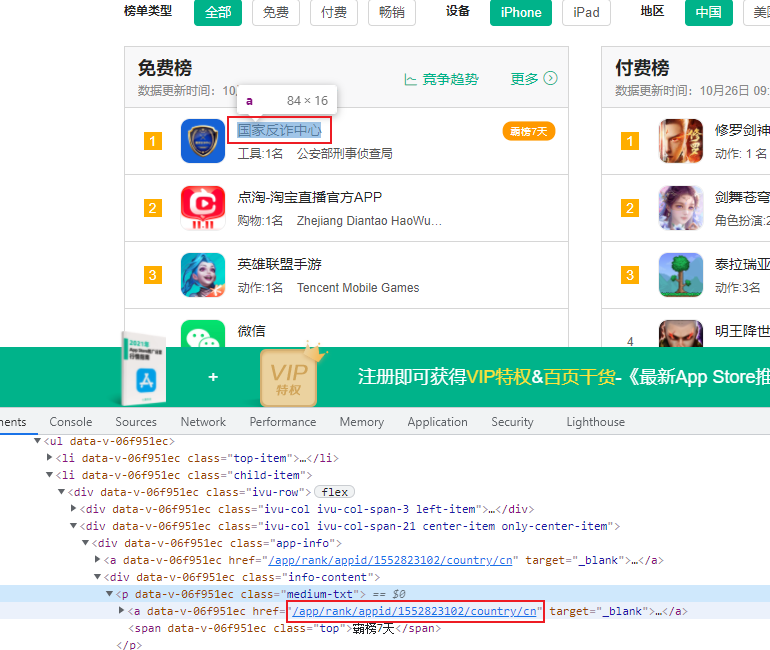

## 请求一级页面的网页源代码

In [14]:
url = 'http://www.tvtv.hk/archives/category/tv'
headers = {
    'User-Agent' :"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:93.0) Gecko/20100101 Firefox/93.0"
}

# verify安全证书函数 False即关闭安全证书认证,不提示网页的安全证书是否存在异常;
rqg = requests.get(url, headers=headers, verify=False)

#chardet.detect会返回一串{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''},再使用['encoding']提取网页中的文件编码
#此目的是为了让网页源代码的编码方式和你所在电脑的解析方式一致
rqg.encoding = chardet.detect(rqg.content)['encoding']
html = etree.HTML(rqg.text)

In [24]:
#直接复制下来的xpath是//*[@id="post-10628"]/header/table/tbody/tr/td[2]/font/h2/a,但只能爬去这一条的数据,因此向上查找层级
title = html.xpath('//header[@class="entry-header"]/table/tbody/tr/td[2]/font/h2/a/@title')
date = html.xpath('//header[@class="entry-header"]/table/tbody/tr/td[2]/div/time/text()')
link = html.xpath('//header[@class="entry-header"]/table/tbody/tr/td[2]/font/h2/a/@href')

## 翻页爬取

已知网站不同页面的路径为:
- http://www.tvtv.hk/archives/category/tv/page/1
- http://www.tvtv.hk/archives/category/tv/page/2
- http://www.tvtv.hk/archives/category/tv/page/3

In [26]:
#列表使用技巧 - 创建10个不同页面的url
url = 'http://www.tvtv.hk/archives/category/tv/page/'
list = [url+str(i) for i in range(1,11)]
print(list)

['http://www.tvtv.hk/archives/category/tv/page/1', 'http://www.tvtv.hk/archives/category/tv/page/2', 'http://www.tvtv.hk/archives/category/tv/page/3', 'http://www.tvtv.hk/archives/category/tv/page/4', 'http://www.tvtv.hk/archives/category/tv/page/5', 'http://www.tvtv.hk/archives/category/tv/page/6', 'http://www.tvtv.hk/archives/category/tv/page/7', 'http://www.tvtv.hk/archives/category/tv/page/8', 'http://www.tvtv.hk/archives/category/tv/page/9', 'http://www.tvtv.hk/archives/category/tv/page/10']


## 完整爬取10页

In [48]:
import requests
from lxml import etree
import pandas as pd
import chardet
import time
import warnings
warnings.filterwarnings("ignore")
import csv

def spide(url):
    headers = {
    'User-Agent' :"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:93.0) Gecko/20100101 Firefox/93.0"
}
    rqg = requests.get(url, headers=headers, verify=False)
    rqg.encoding = chardet.detect(rqg.content)['encoding']
    html = etree.HTML(rqg.text)
    title = html.xpath('//header[@class="entry-header"]/table/tbody/tr/td[2]/font/h2/a/@title')
    date = html.xpath('//header[@class="entry-header"]/table/tbody/tr/td[2]/div/time/text()')
    link = html.xpath('//header[@class="entry-header"]/table/tbody/tr/td[2]/font/h2/a/@href')
    return title,date,link

def main():
    headers = ['标题','发布时间','链接']
    values =[]
    titles = []
    dates =[]
    links = []
    url = 'http://www.tvtv.hk/archives/category/tv/page/'
    list = [url+str(i) for i in range(1,11)]
    for i in list:
        print('>>正在获取:',i)
        title,date,link=spide(i)
        for t in title:
            titles.append(t)
        for d in date:
            dates.append(d)
        for l in link:
            links.append(l)
        time.sleep(3)
    for ii in range(len(titles)):
        value=[titles[ii],dates[ii],links[ii]]
        values.append(value)
    with open(r'G:\Git_\网络爬虫\Python爬虫实战-和鲸社区\输出\Task5.csv','w') as fp:
            writer = csv.writer(fp)
            writer.writerow(headers)
            writer.writerows(values)
if __name__=='__main__':
    main()

>>正在获取: http://www.tvtv.hk/archives/category/tv/page/1
>>正在获取: http://www.tvtv.hk/archives/category/tv/page/2
>>正在获取: http://www.tvtv.hk/archives/category/tv/page/3
>>正在获取: http://www.tvtv.hk/archives/category/tv/page/4
>>正在获取: http://www.tvtv.hk/archives/category/tv/page/5
>>正在获取: http://www.tvtv.hk/archives/category/tv/page/6
>>正在获取: http://www.tvtv.hk/archives/category/tv/page/7
>>正在获取: http://www.tvtv.hk/archives/category/tv/page/8
>>正在获取: http://www.tvtv.hk/archives/category/tv/page/9
>>正在获取: http://www.tvtv.hk/archives/category/tv/page/10


## Task5作业
- 目标网站：http://www.tvtv.hk/archives

- 目标：只需要通过获取htm文件提取文本内容即可，保存方式建议excel、csv

In [21]:
headers = {'User-Agent' :"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:93.0) Gecko/20100101 Firefox/93.0"}
url = 'http://www.tvtv.hk/archives'
html = requests.get(url=url,headers=headers)
html.encoding=chardet.detect(html.content)['encoding']
result = etree.HTML(html.text)

In [22]:
title = result.xpath('//*[@id="main"]/article/div/ul/li/text()')
data = result.xpath('//*[@id="main"]/article/div/ul/li/a/text()')

In [23]:
heading = ['日期','内容']
values =[]
for i in range(len(title)):
    value = [title[i],data[i]]
    values.append(value)

In [25]:
with open(r'G:\Git_\网络爬虫\Python爬虫实战-和鲸社区\输出\Task5_作业.csv','w',newline='') as fp:
    writer = csv.writer(fp)
    writer.writerow(heading)
    writer.writerows(values)

In [26]:
with open(r'G:\Git_\网络爬虫\Python爬虫实战-和鲸社区\输出\Task5_作业.csv','r') as fp:
    reader = csv.reader(fp)
    for i in reader:
        print(i)

['日期', '内容']
['10月25日：', '2021年10月24日电视剧收视率排行榜（突围、前行者、大宋宫词）']
['10月25日：', '2021年10月24日综艺节目收视率排行榜（我们的歌、追梦人无界人生）']
['10月25日：', '2021年10月24日电视台收视率排行榜（上海东方卫视、北京卫视、浙江卫视）']
['10月25日：', '2021年10月23日综艺节目收视率排行榜（非诚勿扰、打卡吧吃货团、最美中国戏、我们的歌、嗨放派）']
['10月25日：', '2021年10月23日电视剧收视率排行榜（突围、前行者、大宋宫词）']
['10月25日：', '2021年10月23日电视台收视率排行榜（浙江省、上海东方卫视、江苏卫视）']
['10月25日：', '2021年10月22日综艺节目收视率排行榜（奔跑吧、2060、请吃饭的姐姐、一起出发吧、时光音乐会）']
['10月25日：', '2021年10月22日电视剧收视率排行榜（大宋宫词、突围、前行者）']
['10月25日：', '2021年10月22日电视台收视率排行榜（上海东方卫视、北京卫视、浙江卫视）']
['10月24日：', '2021年10月21日电视剧收视率排行榜（功勋、突围、大宋宫词）']
['10月24日：', '2021年10月21日综艺节目收视率排行榜（飞猪双11晚会、我是大医生）']
['10月24日：', '2021年10月21日电视台收视率排行榜（江苏卫视、上海东方卫视、浙江卫视）']
['10月21日：', '2021年10月20日电视剧收视率排行榜（功勋、你是我的城池营垒）']
['10月21日：', '2021年10月20日综艺节目收视率排行榜（大戏看北京、今晚、最强大脑）']
['10月21日：', '2021年10月20日电视台收视率排行榜（上海东方卫视、江苏卫视、北京卫视）']
['10月20日：', '2021年10月19日电视剧收视率排行榜（功勋、第十二秒）']
['10月20日：', '2021年10月19日综艺节目收视率排行榜（一站到底青创纪、今晚、生命缘）']
['10月20日：', '2021年10月19日电视台收视率排行榜（江苏卫视、上海东方卫视、浙江卫视）']
['10月19日：', '2021年10月18日电视剧收视率排行榜（功勋